# Data Science Project
This is the notebook that is assosiated with TTDS report, and what wil be used to create all the fancy python graphs\
We first need to import the modules/libaries that we are going to use in this project

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Sets the size for the visulaizations, makes sure they are big enough to be copied into Word
plt.rcParams["figure.figsize"] = (20,10)
print("Imported needed modules!")

Imported needed modules!


Now we want to import the data from the CSV file:

In [2]:
df = pd.read_csv("./Data/traffic_5minutes.csv",delimiter=",")
df.head()

,Date,Records,Bytes,Packets,Date_Code
0,2021/03/28T12:50:00,2.02,131.82,2.32,1
1,2021/03/28T12:55:00,207.98,963369.18,6577.68,2
2,2021/03/28T13:00:00,0.00,0.00,0.00,3
3,2021/03/28T13:05:00,0.00,0.00,0.00,4
4,2021/03/28T13:10:00,0.00,0.00,0.00,5


## Data Scanitisation
The data we have is good but the time stamps aren't going to work when it come to the Linear regression. As we are going in 10 Minute chunks we will assume 12:50:00 is 0 and 12:55:00 is 1 and so on. This should make it easier to work with, I will write a small script at the end of this Notebook to help figure it out!

In [3]:
df_time = list(range(0,len(df["Date"])))

## Visualisations
There are a few visulasations that would be really handy to have:
-	bytes over Time
-	Records over Time
-	Packets over Time
-	Packets over bytes
-	Records over bytes

Text(0, 0.5, 'bytes')

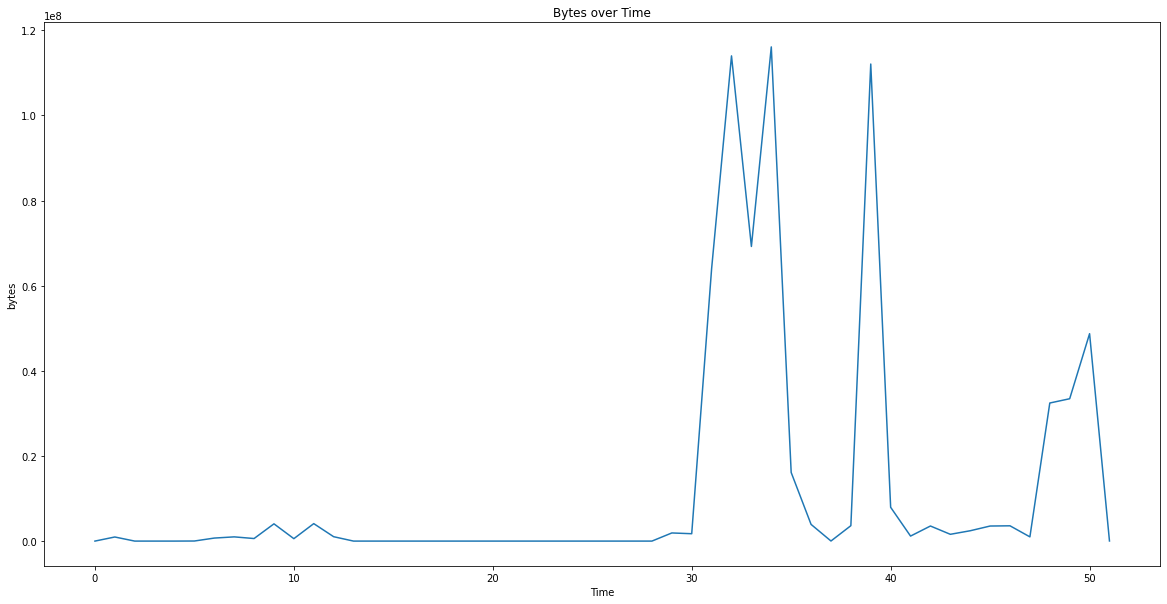

In [4]:
# bytes Over EPHOC Time
plt.plot(df_time,df["Bytes"])
plt.title("Bytes over Time")
plt.xlabel("Time")
plt.ylabel("bytes")

Text(0.5, 1.0, 'Records Over Time')

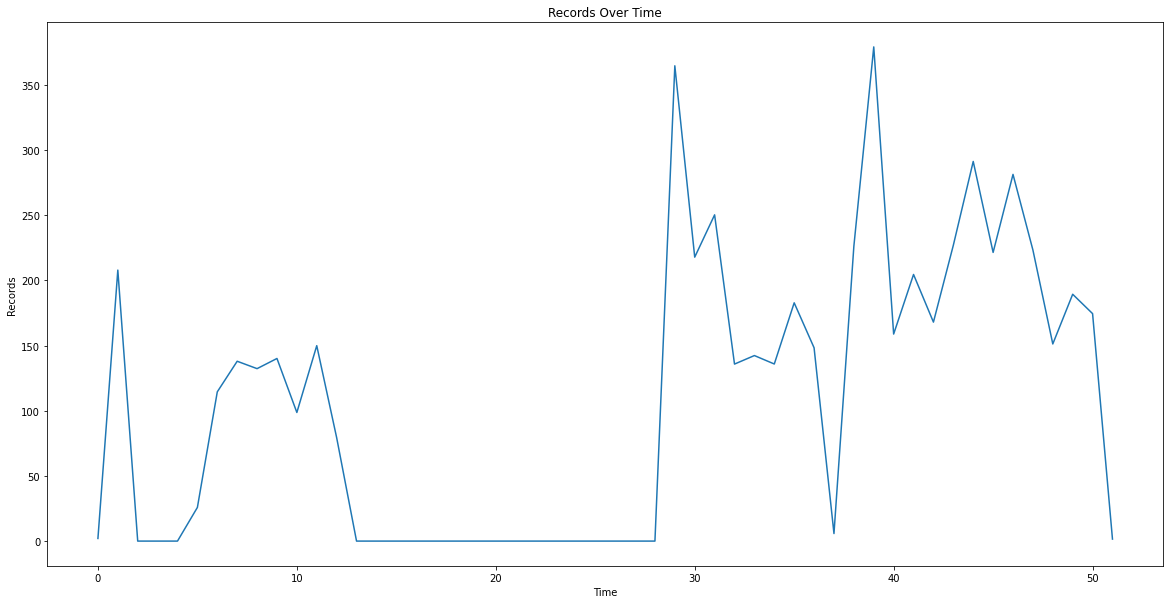

In [5]:
# Records Over Time
plt.plot(df_time,df["Records"])
plt.xlabel("Time")
plt.ylabel("Records")
plt.title("Records Over Time")

Text(0.5, 1.0, 'Packets Over Time')

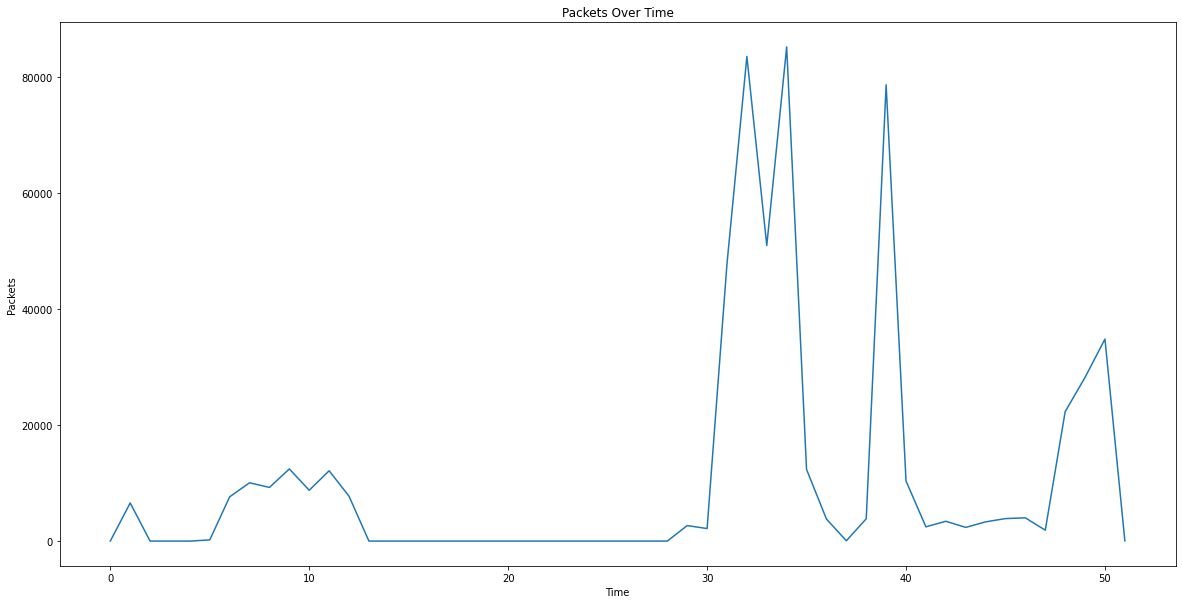

In [6]:
# Packets Over Time
plt.plot(df_time,df["Packets"])
plt.xlabel("Time")
plt.ylabel("Packets")
plt.title("Packets Over Time")

Text(0.5, 1.0, 'Packets Over bytes')

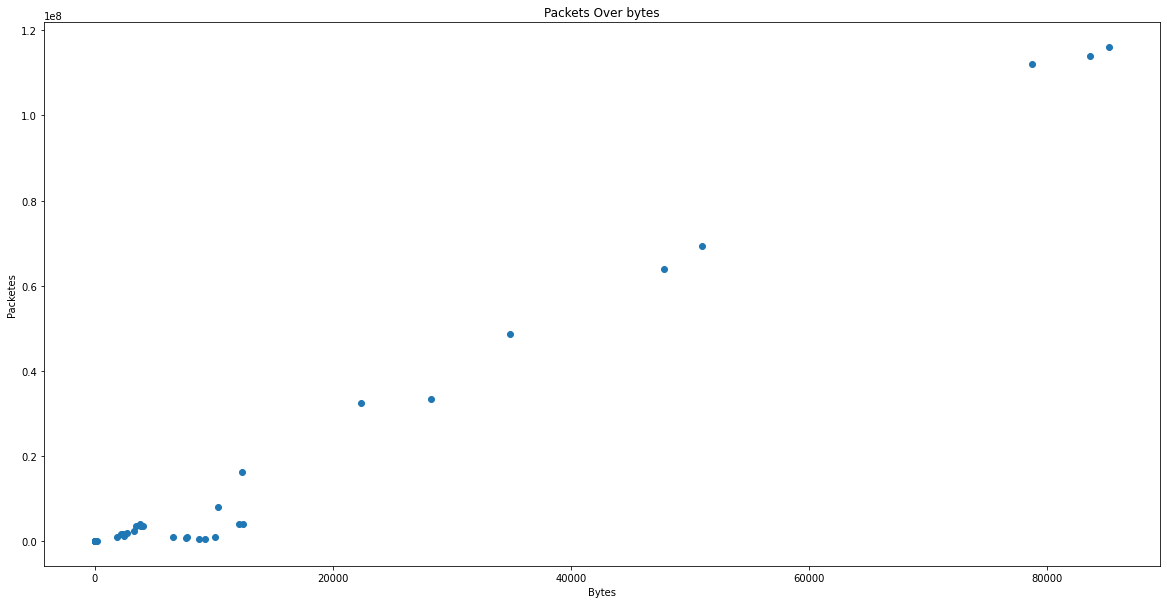

In [7]:
# Records Over Packets
plt.scatter(df["Packets"],df["Bytes"])
plt.xlabel("Bytes")
plt.ylabel("Packetes")
plt.title("Packets Over bytes")

## Graphs with linear Regretion

In [8]:
def error_calc(f,x,y):
    return np.sum((f(x)-y)**2)

The error is: 4.011717747190687e+16 for 1
The error is: 3.968377554945535e+16 for 2
The error is: 3.7374077261104984e+16 for 3
The error is: 3.7274787245386856e+16 for 4


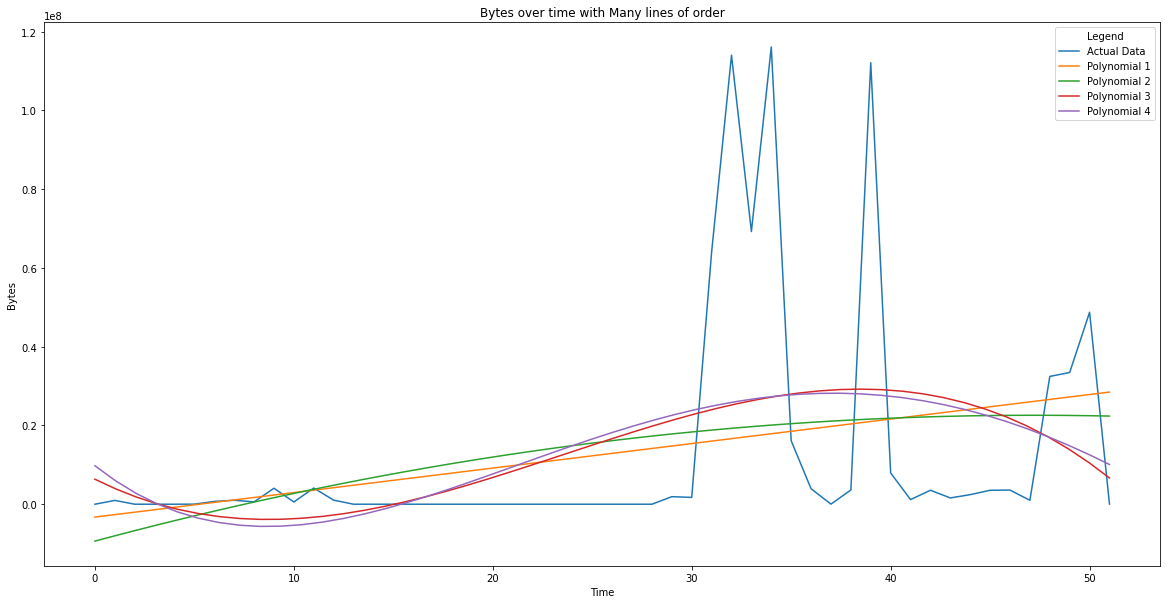

In [9]:
# Bytes Over Time
plt.plot(df_time,df["Bytes"],label="Actual Data")
for i in range(1,5):
    poly = np.poly1d(np.polyfit(df_time,df["Bytes"],i))
    new_x = np.linspace(df_time[0],df_time[-1])
    new_y = poly(new_x)
    plt.plot(new_x, new_y,label="Polynomial %i" %i)
    print(f"The error is: {error_calc(poly,df_time,df['Bytes'])} for {i}")
#plt.ylim(bottom=0)
plt.xlabel('Time')
plt.ylabel('Bytes')
plt.title("Bytes over time with Many lines of order")
plt.legend(title="Legend")

The error is: 1.986565341957725e+16


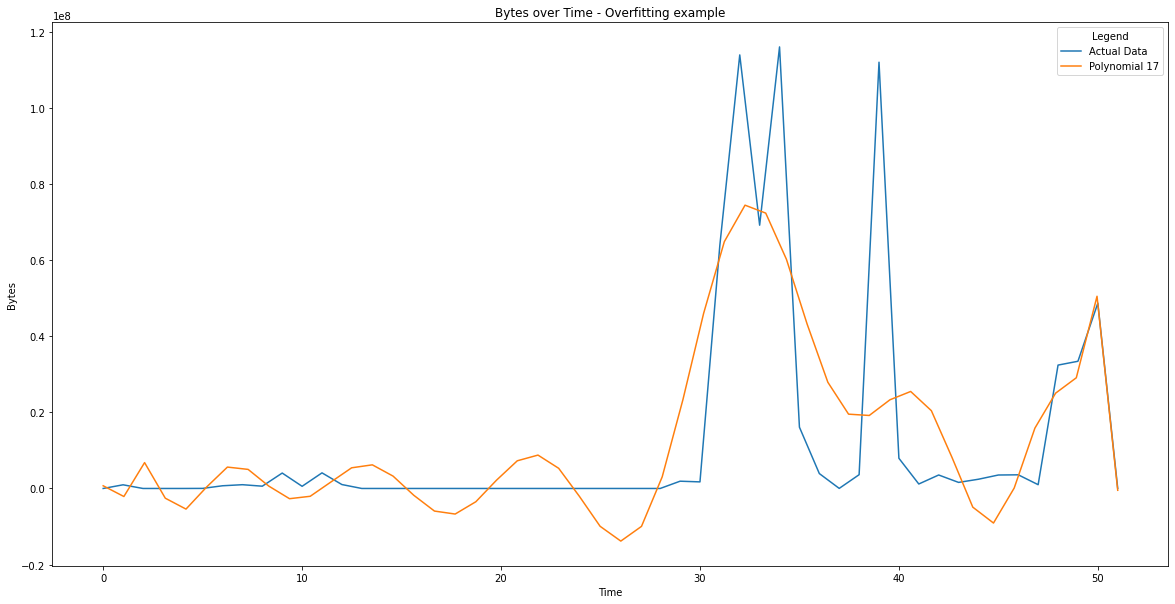

In [10]:
# Example of over fitting
poly = np.poly1d(np.polyfit(df_time,df["Bytes"],17))
new_x = np.linspace(df_time[0],df_time[-1])
new_y = poly(new_x)
print(f"The error is: {error_calc(poly,df_time,df['Bytes'])}")
plt.plot(df_time,df["Bytes"],label="Actual Data")
plt.plot(new_x, new_y,label="Polynomial %i" %17)
plt.xlabel('Time')
plt.ylabel('Bytes')
plt.title("Bytes over Time - Overfitting example")
plt.legend(title="Legend")

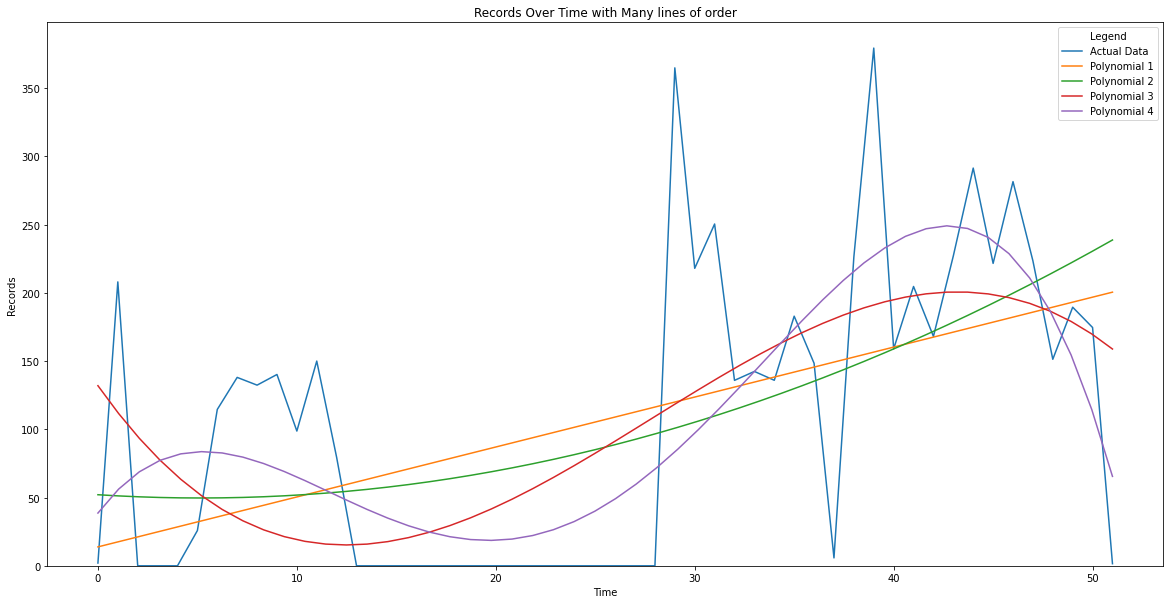

In [11]:
# Records over Time
plt.plot(df_time,df["Records"],label="Actual Data")
for i in range(1,5):
    poly = np.poly1d(np.polyfit(df_time,df["Records"],i))
    new_x = np.linspace(df_time[0],df_time[-1])
    new_y = poly(new_x)
    plt.plot(new_x, new_y,label="Polynomial %i" %i)
plt.ylim(bottom=0)
plt.xlabel('Time')
plt.ylabel('Records')
plt.title("Records Over Time with Many lines of order")
plt.legend(title="Legend")

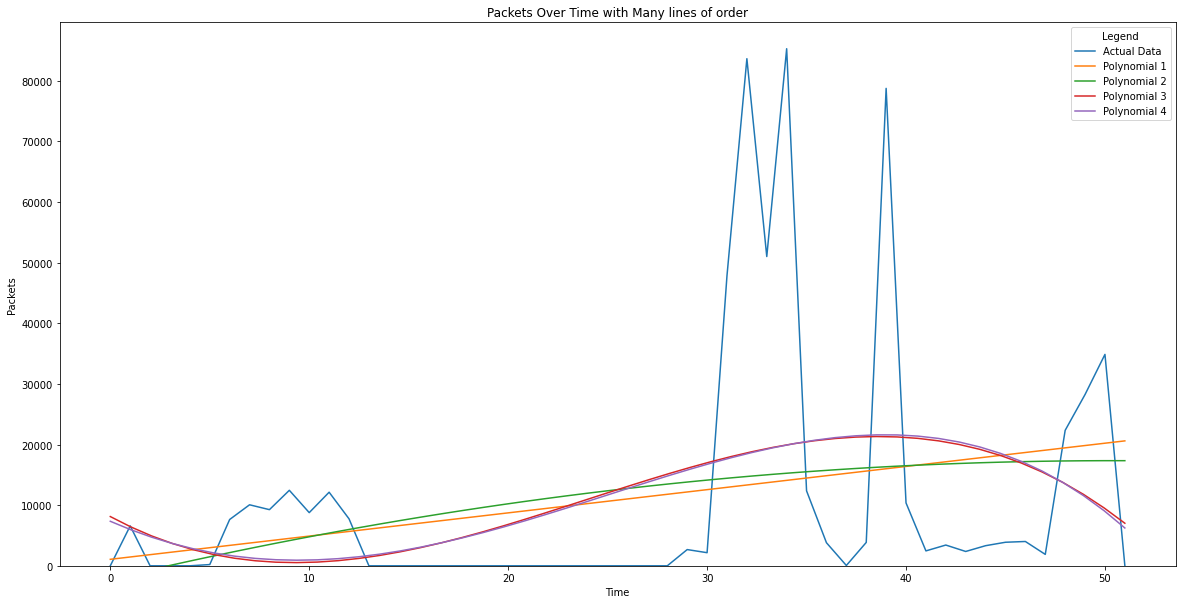

In [12]:
# Packets over Bytes
plt.plot(df_time,df["Packets"],label="Actual Data")
for i in range(1,5):
    poly = np.poly1d(np.polyfit(df_time,df["Packets"],i))
    new_x = np.linspace(df_time[0],df_time[-1])
    new_y = poly(new_x)
    plt.plot(new_x, new_y,label="Polynomial %i" %i)
plt.ylim(bottom=0)
plt.xlabel('Time')
plt.ylabel('Packets')
plt.title("Packets Over Time with Many lines of order")
plt.legend(title="Legend")

## Machine Learning / Predictions
Now that we have made the visualisations we can start to make some predictions, We need to have to bits of infomation to ask for a prediciton. The only solid correlations we have found are:
-	Bytes over Time
-	Records over Time
-	Packets over Time\
We are going to predict number of bytes if we supply the script with a time code:  \
We first need to split the data into testing and training data:

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
X_train = np.transpose(np.array(train_set["Date_Code"]))
X_test = np.transpose(np.array(test_set["Date_Code"]))
y_train = np.transpose(np.array(train_set['Bytes']))
y_test = np.transpose(np.array(test_set['Bytes']))

 Scale the data:

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))

Now it's time to carry out the linear regression...ie plot the line of best fit:

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
regression = lin_reg.fit(X_train,y_train)

We can ask the get some predictions from the test data that we took out earlier, we could use all of it but that would make the tables in the report huge:

In [16]:
regression.predict([[46],[48],[50],[51]])

array([23862700.47156414, 25087983.09534474, 26313265.71912534,
       26925907.03101564])

Time to calculate the error:

In [17]:
from sklearn.metrics import mean_squared_error
predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train,predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

26353797.26174041

## Scaling up Machine Learning
Now we know we can predict the usage its worth scaling it up to make sure preformance is going to be at least ok should we have a heap of data. It's possible that for one days worth of data would mean 288 rows of data or 2016 rows for one week even more if the data is for a whole month.\
Start a Dask Cluster to allow for the use of multiple cores:

In [18]:
from dask.distributed import LocalCluster
cluster = LocalCluster()
cluster
# An Error with this cell would appear to be normal....

TraitError: The 'selected_index' trait of an Accordion instance must be an int, but a value of None <class 'NoneType'> was specified.

LocalCluster(290fa219, 'tcp://127.0.0.1:43215', workers=4, threads=8, memory=12.40 GiB)

In [37]:
from dask.distributed import Client
# Local worker
#client = Client(cluster)
# Nanny Worker
client = Client("192.168.0.10:8786")
client

distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available


Client Scheduler: tcp://192.168.0.10:8786 Dashboard: http://192.168.0.10:8787/status,Cluster Workers: 2 Cores: 8 Memory: 1.81 GiB


Now that's done we can open our CSV file that contains the data, using the same line of code we can also load up multiple CSV files (This would be useful if we had a weeks worth of data spread over multiple files!)

In [39]:
import dask.dataframe as ddf
import dask
#dask_df = dask.dataframe.read_csv("./Data/2020-*-*.csv")
# Local Cluster
dask_df = ddf.read_csv("~/traffic_5minutes.csv")

We can then extract our X and Y axis:

In [40]:
y = dask_df.Bytes.to_dask_array(lengths=True)
y

KilledWorker: ("('read-csv-len-d9bf4fa06101afcfb9129b94ed978f36', 0)", <Worker 'tcp://192.168.0.51:41021', name: tcp://192.168.0.51:41021, memory: 0, processing: 1>)

In [43]:
X = dask_df.drop(columns=["Date","Packets","Records","Bytes"]).to_dask_array(lengths=True)
X

KilledWorker: ("('read-csv-len-0c115b64b0bcaddf5f640fe11bc918d1', 0)", <Worker 'tcp://192.168.0.51:41021', name: tcp://192.168.0.51:41021, memory: 0, processing: 1>)

We then split the data into training and testing Data:

In [44]:
from dask_ml.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

NameError: name 'X' is not defined

Run the preprocessing agained the test and train data:

In [24]:
from dask_ml.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

It's finally time to run our Liner regression, we have a few different perameters to play with here too, including different solving methods (I don't really understand thease so I just tried playing with them all!)

In [42]:
#%%time
from dask_ml.linear_model import LinearRegression
# solver : {‘admm’, ‘gradient_descent’, ‘newton’, ‘lbfgs’, ‘proximal_grad’}
lr = LinearRegression(solver='gradient_descent', max_iter=100)
#lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)
#slope, intercept, r, p = lr.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [41]:
from dask_ml.metrics import mean_squared_error
from math import sqrt

predicted = lr_model.predict(X_train)
std_err = sqrt(mean_squared_error(y_train, predicted))
print(f"The standard Error for this set is: {std_err}")
#lr_model.predict(X_train)

NameError: name 'lr_model' is not defined

To see the values that have been predicted we can simply display them on here, although they could be written to a CSV file. We do see some interesting results in our data too! (This is still being displayed in Bytes rather then Megabytes)

In [27]:
import dask.array as da
test = da.from_array([[46],[48],[50],[51]])
test = lr_model.predict(test)

In [28]:
import dask
dask.compute(test)

(array([26920152.95408222, 28362803.59380447, 29805454.23352673,
        30526779.55338785]),)